In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, make_scorer, fbeta_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('input/winequality-red.csv',delimiter=';')

EDA

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Check missing values, no missing values
wine_df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
#no missing values, our dataset are clean

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='count'>

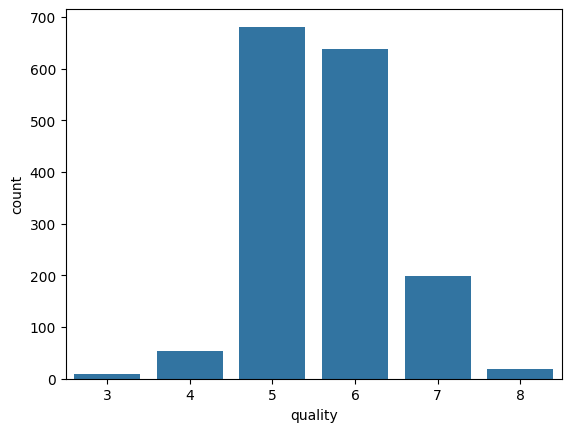

In [10]:
sns.countplot(data=wine_df,x='quality')

<Axes: xlabel='quality', ylabel='percent'>

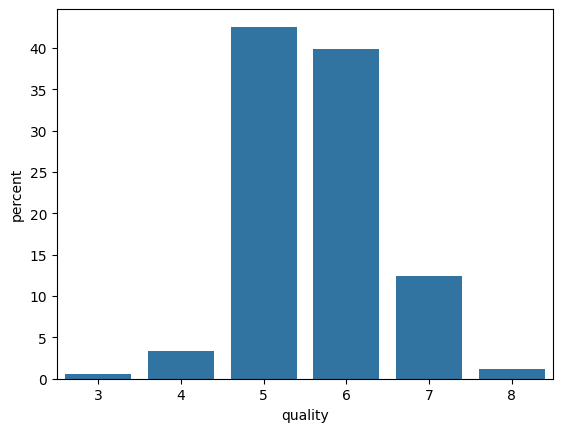

In [11]:
sns.countplot(data=wine_df,x='quality',stat="percent")

Let's define good high quality wine will have score above 6, this will be the threshold

In [12]:
wine_df['hi_quality']= (wine_df.quality > 6).astype('int64')
wine_df['hi_quality'].value_counts()/wine_df['hi_quality'].count()

hi_quality
0    0.86429
1    0.13571
Name: count, dtype: float64

Text(0, 0.5, 'Prcent of Quality Wine')

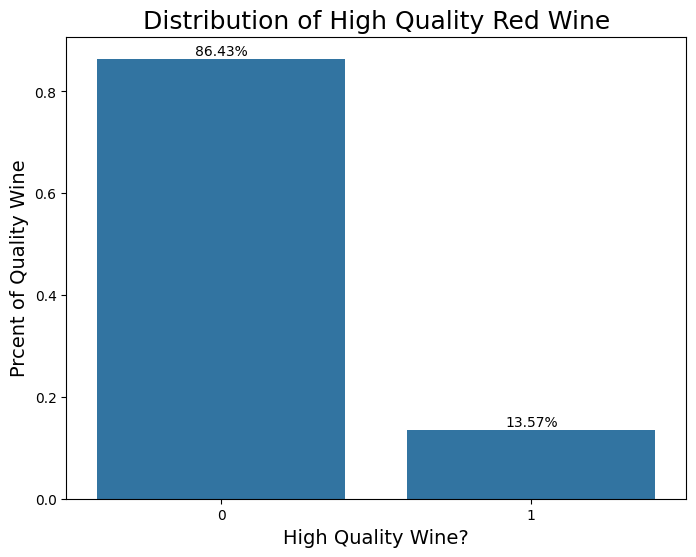

In [13]:
plt.figure(figsize=(8,6))

b=sns.barplot(x=wine_df.hi_quality.value_counts(normalize=True).index, y=wine_df.hi_quality.value_counts(normalize=True))

for p in b.patches:
    b.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
b.axes.set_title("Distribution of High Quality Red Wine",fontsize=18)
b.set_xlabel("High Quality Wine?",fontsize=14)
b.set_ylabel("Prcent of Quality Wine",fontsize=14)

As can be seen above, only 13.57% of our wines have superior quality. We have an imbalance dataset here

In [14]:
# create copy of the original df
wine_df1=wine_df.copy()

wine_df1.drop('quality', axis=1,inplace=True)

In [16]:
wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,hi_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [17]:
wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  hi_quality            1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


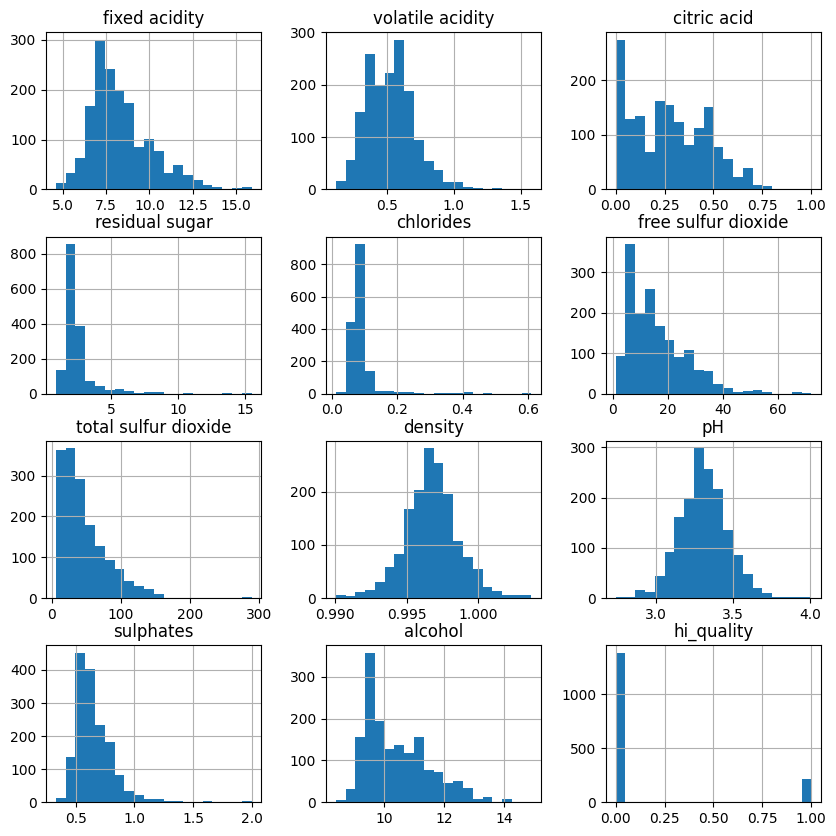

In [18]:
wine_df1.hist(bins=20, figsize=(10,10))
plt.show()

sns.pairplot(wine_df1)

PREPROCESSING:
Our dataset is clean, no duplicate and no missing values
Let's create heatmap to show correlation between features in the dataset

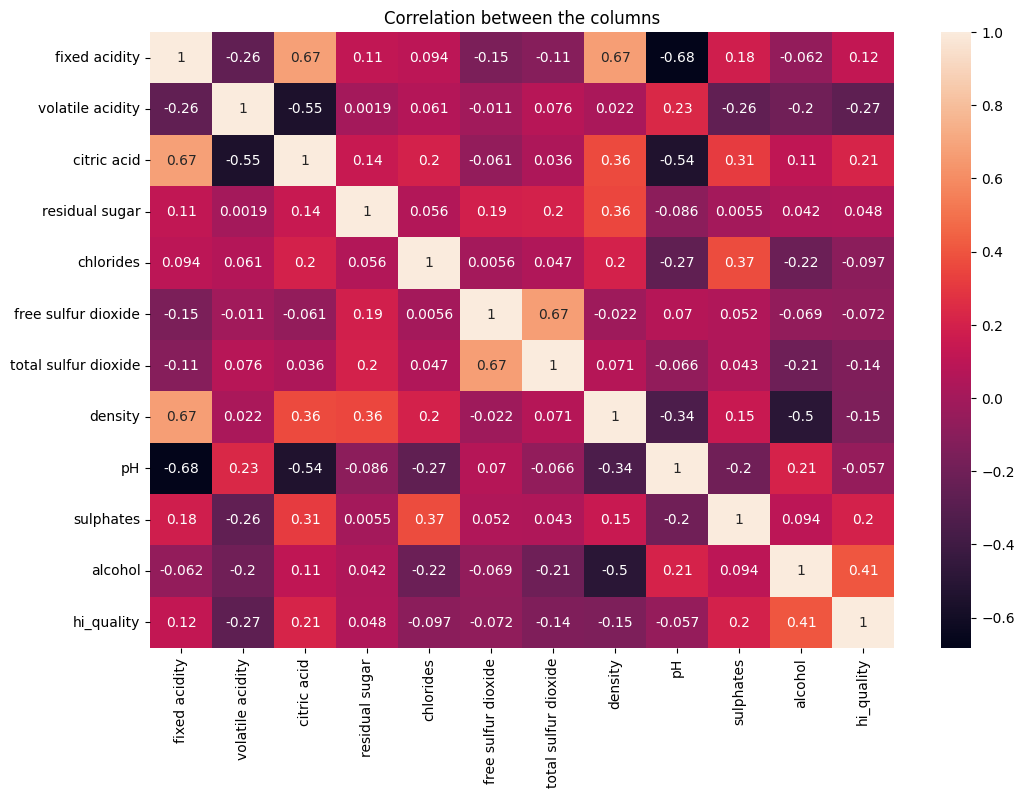

In [20]:
#create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(wine_df1.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

The heatmap shows that pH, volatile acidity,chlorides, density,total sulfur dioxide and free sulfur dioxide have inverse correlation with hi_quality
Multicollinearity:
There is a strong positive correlation between fixed acidity and density (0.67). 
Also a strong positive correlation between total sulfur dioxide and free sulfur dioxide (0.67)
We will keep an eye on this going forward but for now will not drop any columns from the dataset

In [24]:
wine_df1.corr()['hi_quality'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
hi_quality              1.000000
Name: hi_quality, dtype: float64

<Axes: title={'center': 'Correlation with high quality'}>

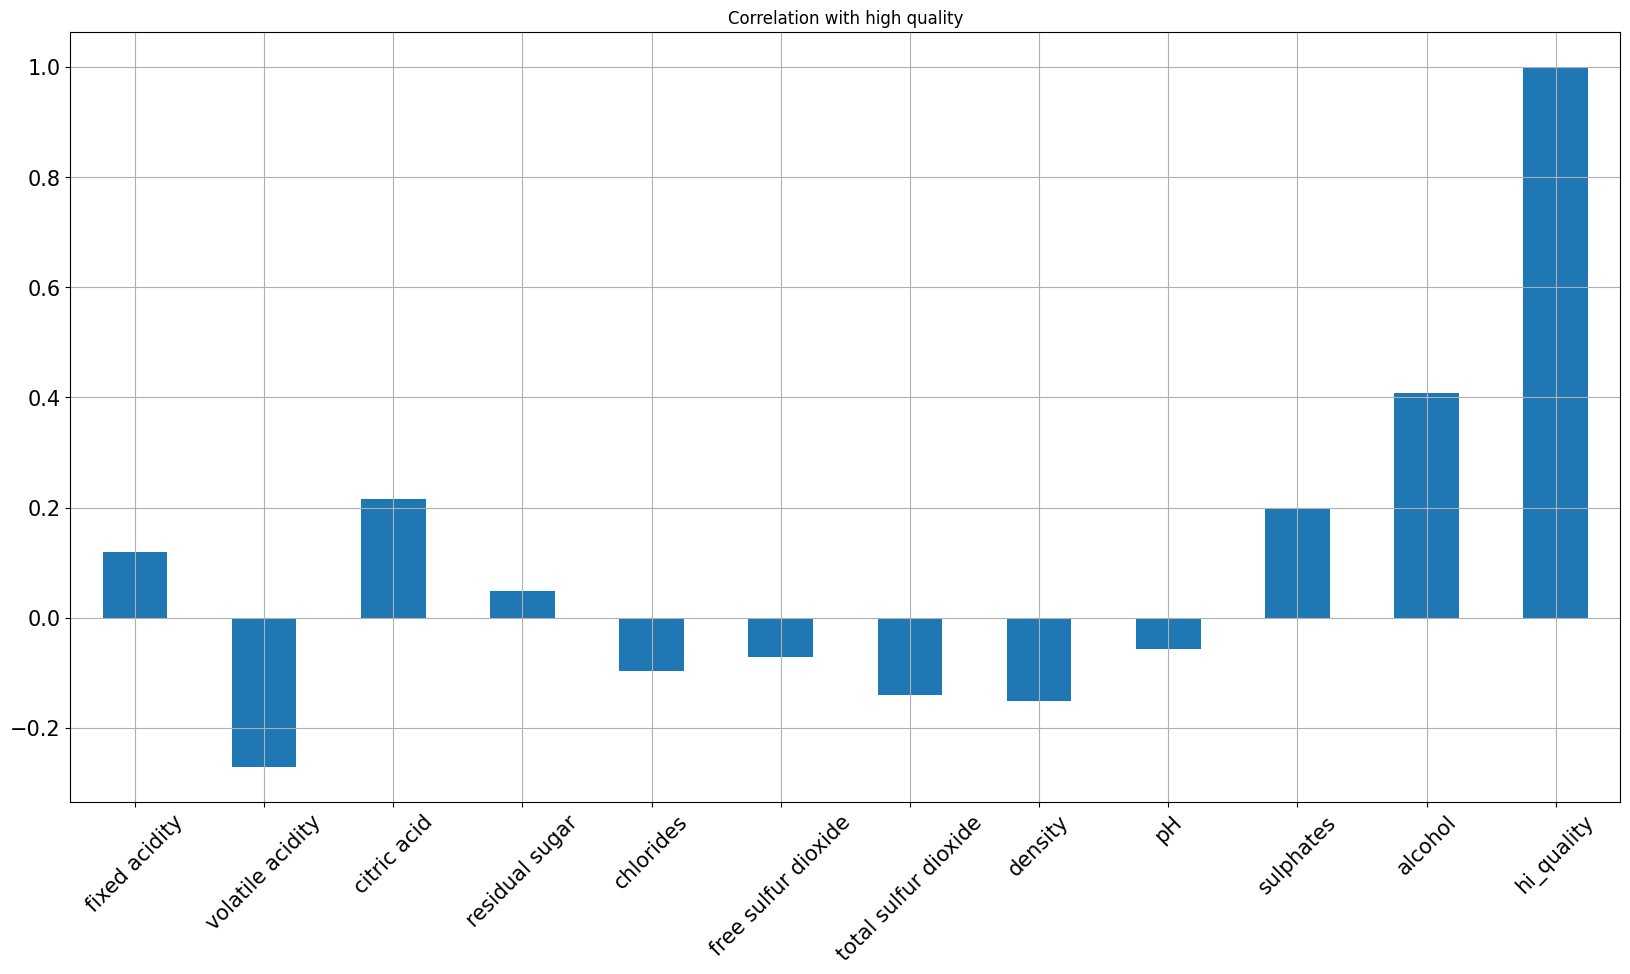

In [22]:
wine_df1.corrwith(wine_df1.hi_quality).plot.bar(figsize = (20, 10), title = "Correlation with high quality", fontsize = 15,
        rot = 45, grid = True)

the feature with highest correlation with hi_quality is alcohol, the lowest correlation is residual sugar 

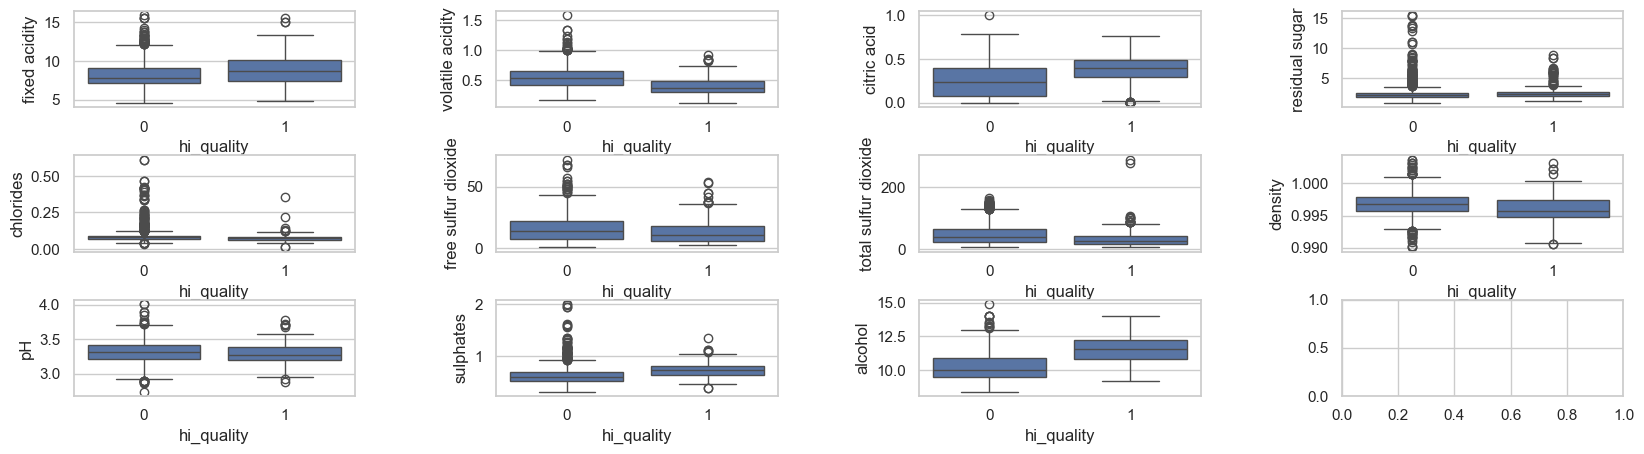

In [27]:
sns.set(style="whitegrid")

_, ax = plt.subplots(3, 4, figsize=(20, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

cols = [col for col in wine_df1.columns if col != 'hi_quality']
#cols = [col for col in wine_df1.columns if col not in ['quality', 'hi_quality']]
for i, var in enumerate(cols):
    sns.boxplot(x='hi_quality', y=var, data=wine_df, ax=ax.flatten()[i])
    #ax.set_xlabel("High Quality", fontsize=14)    
    #ax.set_ylabel("Total Bill", fontsize=14)


The boxplot shows the following: a. Higher alcohol make better wine. High quality wine has about 1.5% more alcohol on average than low quality wine. Most wine in our dataset has alcohol level below 14% b. Lower level of volatile acidity make better wine. Volatile acids, similar to acetic acid, give a sour taste to our wine, degrading its quality. Hence we see a negative correlation here c. Higher citric acid means better wine. I think citric acid give the wine a "fresh" taste, enhancing its flavor. CItric acid is often use as stabilizer in food and beverage d. The more sulphates, the better the wine.

High quality wines have about 1.5% more alcohol on average than low quality wines. While it’s  unclear exactly why this might be the case, it may simply be due to general taste preferences of the  raters lean more towards wine that is alcoholic. This was shown to be statistically significant via a t test (p-value < .001) 


In [25]:
# t-test on columns that are strongly related (either positively or negatively) with target variable hi_quality
# perform t-test for hi_quality vs alcohol, volatile acidity, citric acid, and sulphates
# t-test for alcohol vs hi_quality
from scipy import stats

group1 = wine_df1[wine_df1['hi_quality'] == 1]['alcohol'].values
group2 = wine_df1[wine_df1['hi_quality'] == 0]['alcohol'].values

stats.ttest_ind(group1, group2)

TtestResult(statistic=17.822763607394528, pvalue=6.016774226316707e-65, df=1597.0)

p-value is significantly less than 0.05, we can conclude that there is a statistically significant difference in alcohol content between high and low quality wines, supporting the observation from the boxplot.
the test result showing pvalue less than 0.05, so we can reject null hypothesis; the result is statistically significant.
High-quality wines have significantly more alcohol than low-quality wines

In [26]:
#t-test for hi_quality vs citric acid
group1 = wine_df1[wine_df1['hi_quality'] == 1]['citric acid'].values
group2 = wine_df1[wine_df1['hi_quality'] == 0]['citric acid'].values

stats.ttest_ind(group1, group2)

TtestResult(statistic=8.785474791138187, pvalue=3.9347797379848406e-18, df=1597.0)

High quality wines have about 0.18% more citric acid on average than low quality wines. Citric acid can give the wine a "fresh"  taste, enhancing its flavor. we perform t-test to validate this.
T test result showin p-value significantly less than 0.05, we can conclude that there is a statistically significant difference in citric acid content between high and low quality wines, supporting the observation from the boxplot.

In [36]:
#There is an inverse relationship between volatile acidity and wine quality: the volatile acidity in high quality wines are 0.2% less than the of volatile acidity in low quality wine.
#Volatile acids, similar to acetic acid, give a sour taste to our wine, degrading its quality. 
#This relationship was shown to be statistically significant via a t-test (p-value < 0.05)

#t-test for hi_quality vs volatile acidity

hi_quality_wine = wine_df1[wine_df1['hi_quality'] == 1]['volatile acidity'].values
low_quality_wine = wine_df1[wine_df1['hi_quality'] == 0]['volatile acidity'].values
stats.ttest_ind(hi_quality_wine, low_quality_wine)

TtestResult(statistic=-11.237923111478523, pvalue=2.9578633809350365e-28, df=1597.0)

In [37]:
#High quality wines have about 0.2% more sulphates on average than low quality wines. we perform t-test to validate this.
#T test result showing p-value significantly less than 0.05, we can conclude that there is a statistically significant difference in sulphates content between high and low quality wines, supporting the observation from the boxplot.

#t-test for hi_quality vs sulphates

hi_quality_wine = wine_df1[wine_df1['hi_quality'] == 1]['sulphates'].values
low_quality_wine = wine_df1[wine_df1['hi_quality'] == 0]['sulphates'].values

stats.ttest_ind(hi_quality_wine, low_quality_wine)

TtestResult(statistic=8.13543965838325, pvalue=8.162918771636208e-16, df=1597.0)

In [38]:
#lets do t-test for features with the weak correlation: pH and residual sugar
hi_quality_wine = wine_df1[wine_df1['hi_quality'] == 1]['pH'].values
low_quality_wine = wine_df1[wine_df1['hi_quality'] == 0]['pH'].values

stats.ttest_ind(hi_quality_wine, low_quality_wine)

TtestResult(statistic=-2.292949742323404, pvalue=0.02198034398691512, df=1597.0)

In [40]:
#the t-test showing p-value > 0.01 but less than 0.05

In [41]:
hi_quality_wine = wine_df1[wine_df1['hi_quality'] == 1]['residual sugar'].values
low_quality_wine = wine_df1[wine_df1['hi_quality'] == 0]['residual sugar'].values

stats.ttest_ind(hi_quality_wine, low_quality_wine)

TtestResult(statistic=1.9115483882007416, pvalue=0.056112960300893605, df=1597.0)

In [42]:
#the t-test showing p-value > 0.05

MODELING: Scaling: The range of features is not very distinct, but there are some differences. We are going to try several different classification algorithms, including Random Forest. We will use sklearn's StandardScaler, which applies a linear transformation to our features such that their mean is zero and their variance is one. We will apply scaling to all classifiers. We will use standard scaler for this purpose.

Training and Evaluation:
The default scoring for classification is accuracy (correct classification count / total count). However, we are facing a skewed/imbalance classes classification problem, so accuracy may not the best measure. We also have precision, recall, and F1, which are more suitable for this case. 

However, it is good to have a single real number evaluation metric in order to compare different models objectively. We want to be confident that the wine will be of superior quality so the customer will not be disappointed. In this scenario, minimizing false positives (labeling a mediocre wine as high quality) is more important than potentially missing a few good wines (false negatives), which means precision is more important than recall.

However we will not stated that  "no wine is worthy", either, so we may use a weighted version of F1, fbeta_score. Beta is a parameter that measures how important is recall over precision, where beta=0 means 'consider only precision' and beta=inf means 'consider only recall'.





In [43]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  hi_quality            1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [46]:
wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,hi_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [47]:
unique_count = wine_df1['hi_quality'].nunique()

print(unique_count) 

2


In [48]:
wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  hi_quality            1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
X=wine_df1
y=wine_df1['hi_quality']
X.drop('hi_quality',axis=1,inplace=True)

In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: hi_quality, dtype: int64

In [52]:
print(X.shape)
print(y.shape)
      

(1599, 11)
(1599,)


In [53]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [58]:
wine_df1.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [69]:
features_label = wine_df1.columns[:11]

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': features_label, 'importance': importances})
# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)



                 feature  importance
10               alcohol    0.178271
9              sulphates    0.129120
1       volatile acidity    0.106642
2            citric acid    0.095941
7                density    0.089775
6   total sulfur dioxide    0.083130
0          fixed acidity    0.070377
4              chlorides    0.069779
3         residual sugar    0.060297
8                     pH    0.060281
5    free sulfur dioxide    0.056388


plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="blue", align="center")
plt.xticks(range(X.shape[1]),features_label[::-1], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


plt.figure(figsize=(20, 10))
plt.bar(features_label, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Importance')
#plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

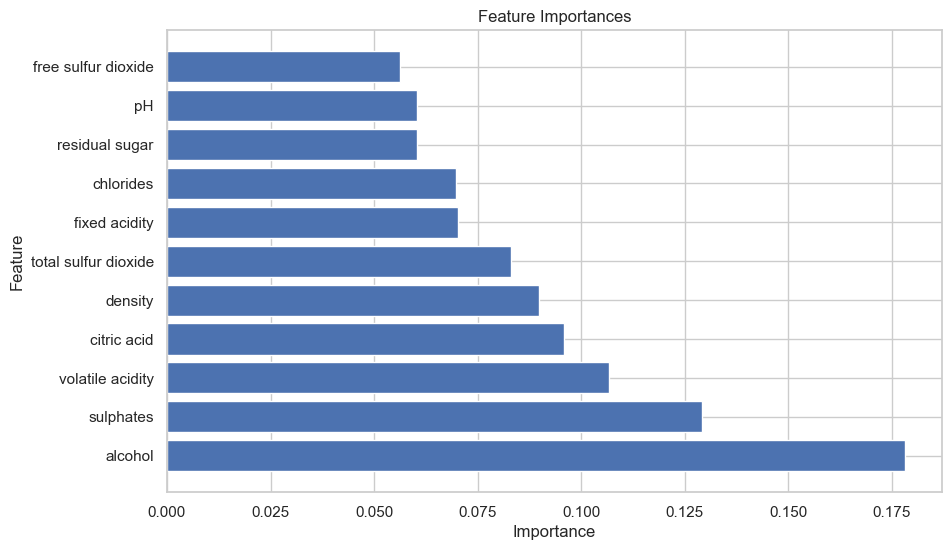

In [75]:
# Plot the feature importances as horizontal barplot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Model#1: LOGISTIC REGRESSION
we will first try to build a logistic regression model, which is specifically designed for binary classification problems and the most straightforward model in our case



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,make_scorer, precision_score, recall_score, f1_score, roc_auc_score

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

# MODEL #1: LOGISTIC REGRESSION

lr=LogisticRegression(solver='liblinear').fit(X_train2, y_train)

# Predicting Test Set
#y_pred = classifier.predict(X_test)
#pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
test_accuracy = accuracy_score(y_test, pred_test)
test_cf_matrix=confusion_matrix(y_test, pred_test)
test_cl_report=classification_report(y_test,pred_test)

In [77]:

print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

TEST RESULTS: 
Accuracy: 0.865625
Confusion Matrix:
 [[264   9]
 [ 34  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



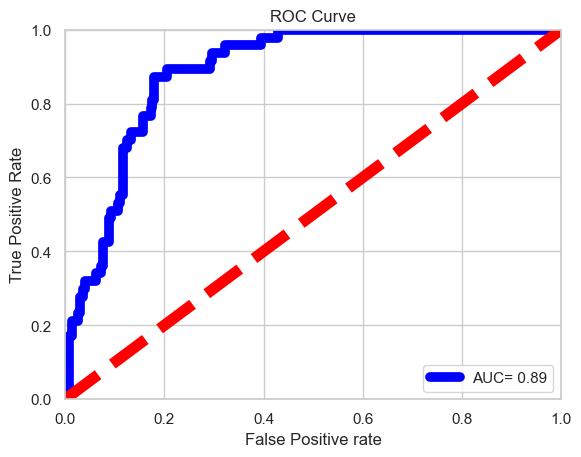

AUC-ROC Score: 0.8876159301691217 



In [78]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
ypp=lr.predict_proba(X_test2)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, ypp)
#roc_auc = auc(fpr,tpr)
auc=roc_auc_score(y_test,ypp)

plt.figure()
#plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot(fpr,tpr,color="blue",lw=7,label="AUC= %0.2f" % auc)
plt.plot([0,1],[0,1],color="red",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
#plt.title("Receiver operating characterisitic")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
print("AUC-ROC Score:", auc, "\n")

In [79]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

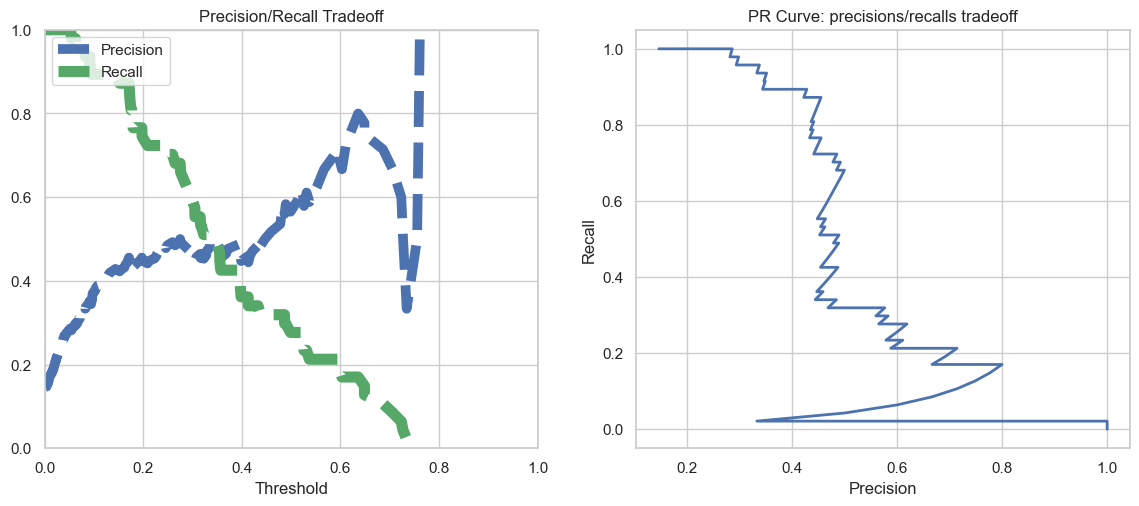

In [80]:
#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", lw=7,label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", lw=8, label="Recall")
#plt.plot([0,1],[0,1],color="red",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls, lw=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

######Choose a New Threshold:
For Higher Precision:
Select a higher threshold value. This will reduce the number of false positives, but might increase the number of false negatives.
For Higher Recall:
Select a lower threshold value. This will reduce the number of false negatives, but might increase the number of false positives.

#select a new threshold
new_threshold = 0.4
#apply the new threshold
y_pred=(ypp >= new_threshold).astype(int)
print(classification_report(y_test, y_pred))

The Logistic Regression model has F1-score of 0.38 and AUC-ROC score of 0.89 for high quality wine class. Considering only small percentage of wines are high quality, the Linear Regression model is doing a good job in predicting wine quality. We have imbalance dataset. The F1 score is generally better than the area under the curve (AUC) for imbalanced datasets when the minority class is of interest. The F1 score is the harmonic mean of precision and recall, which balances the importance of both metrics. It's a more robust evaluation metric than accuracy because it gives a fair representation of a model's performance despite class imbalance.

AUC The AUC is a single value that summarizes a model's overall performance. It's useful for comparing the performance of multiple models. However, the AUC and ROC curve may not be well-suited for imbalanced problems because they may be biased toward the majority class.

The accuracy score may also be less useful here as there is lesser emphasis on the minority class (hi quality = 1) with better results in the majority class.

Now we will perform hyperparameter tuning for our logistic regression model via GridSearchCV (with Cross Validation = 5) to improve the result


Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}

Accuracy Tuned for Logistic Regression: 0.846875

Confusion Matrix Tuned for Logistic Regression: 
 [[245  28]
 [ 21  26]]

Classification Report Tuned for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       273
           1       0.48      0.55      0.51        47

    accuracy                           0.85       320
   macro avg       0.70      0.73      0.71       320
weighted avg       0.86      0.85      0.85       320
 



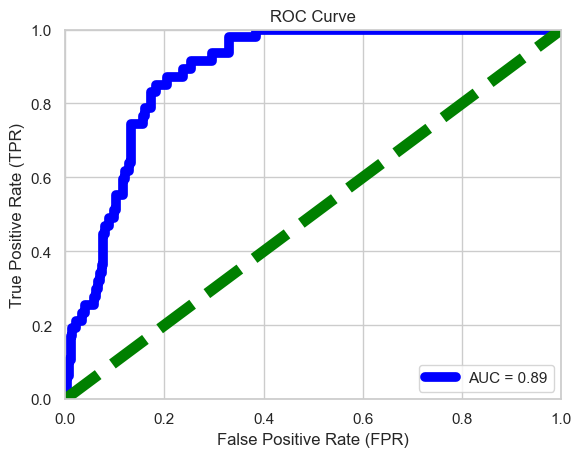

AUC-ROC Score: 0.8871483126802275


In [82]:
from sklearn.model_selection import StratifiedKFold
# Hyperparameter Tuning
param_grid_lr = {  
    'C' : [0.0001, 0.001, .01, .1, .5, 1, 10,100,1000],
    'penalty': ['l1', 'l2'], 
}
cross_validation = StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
#GridSearchCV
#grid_search_lr=GridSearchCV(LogisticRegression(solver='liblinear',max_iter=1000), param_grid_lr,cv=5,n_jobs=-1,scoring = 'roc_auc')
grid_search_lr=GridSearchCV(LogisticRegression(solver='liblinear',max_iter=1000), param_grid_lr,cv=cross_validation,n_jobs=-1,scoring = 'roc_auc')
grid_search_lr.fit(X_train2,y_train)


#new_threshold = 0.4
new_threshold1 = 0.39

best_params_lr=grid_search_lr.best_params_
best_estimator_lr=grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train2,y_train)

y_pred_tuned_lr=best_estimator_lr.predict_proba(X_test2)[:,1]
y_pred_new = (y_pred_tuned_lr >= new_threshold1).astype(int)
#accuracy_tuned_lr=accuracy_score(y_test,y_pred_tuned_lr)
accuracy_tuned_lr=accuracy_score(y_test,y_pred_new)
#cf_matrix_tuned_lr=confusion_matrix(y_test,y_pred_tuned_lr)
cf_matrix_tuned_lr=confusion_matrix(y_test,y_pred_new)
#cl_report_tuned_lr=classification_report(y_test,y_pred_tuned_lr)
cl_report_tuned_lr=classification_report(y_test,y_pred_new)

print("\nBest Parameters for Logistic Regression:", best_params_lr)
print("\nAccuracy Tuned for Logistic Regression:", accuracy_tuned_lr)
print("\nConfusion Matrix Tuned for Logistic Regression:", "\n", cf_matrix_tuned_lr)
print("\nClassification Report Tuned for Logistic Regression:", "\n",cl_report_tuned_lr,"\n")

#AUC ROC
y_prob_lr=best_estimator_lr.predict_proba(X_test2)[:,1]
#y_prob_new_lr = (y_prob_lr >= new_threshold).astype(int)
fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test,y_prob_lr)
#fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test,y_prob_new_lr)
roc_auc_lr=roc_auc_score(y_test,y_prob_lr)
#roc_auc_lr=roc_auc_score(y_test,y_prob_new_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=7, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=8, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc_lr)

y_pred_tuned_lr=best_estimator_lr.predict_proba(X_test2)[:,1]
y_pred_tuned_lr

grid_search_lr.cv_results_

With the hyperparameter tuning and cross validation, the F1-score went up from 0.38 to 0.51 for hi_quality class and the AUC-ROC Score stay the same at 0.89
With the relatively small set of data, such scores are decent in aiding the company to predict wine quality

We will seek to examine the data through a different model - Random Forest. Considering the numerous correlations across the features, the low F1 score in the logistic regression may be attributed to more non-linear and complex relationships across features and hi quality wine. There may also be more noisy data in this case as our hyperparameter tuning did not pose much benefit to the logistic regression. This prompt us to utilise the Random Forest model to see if we can deal better with the possible presence of complex relationships and noisy data.

In [83]:
#model #2 : RANDOM FOREST
RF_model=RandomForestClassifier(n_estimators=100, bootstrap=False)
RF_model.fit(X_train2,y_train)
y_test_pred=RF_model.predict(X_test2)
y_train_pred=RF_model.predict(X_train2)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_test_pred)
test_cf_matrix=confusion_matrix(y_test,y_test_pred)
test_cl_report=classification_report(y_test,y_test_pred)

In [84]:
print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

TRAINING RESULTS: 
Accuracy: 1.0
Confusion Matrix:
 [[1109    0]
 [   0  170]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

TEST RESULTS: 
Accuracy: 0.909375
Confusion Matrix:
 [[265   8]
 [ 21  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.76      0.55      0.64        47

    accuracy                           0.91       320
   macro avg       0.85      0.76      0.80       320
weighted avg       0.90      0.91      0.90       320



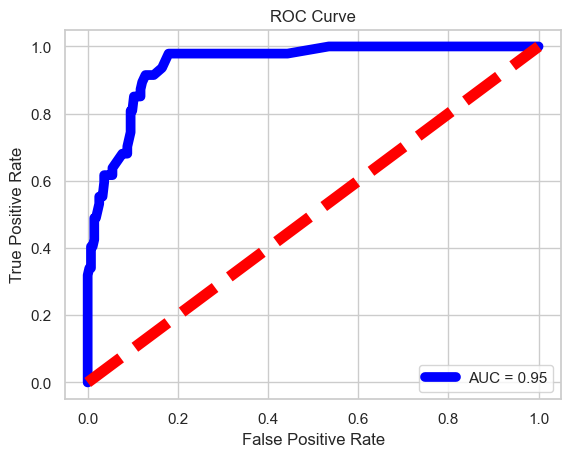

AUC-ROC Score: 0.9457174031642117 



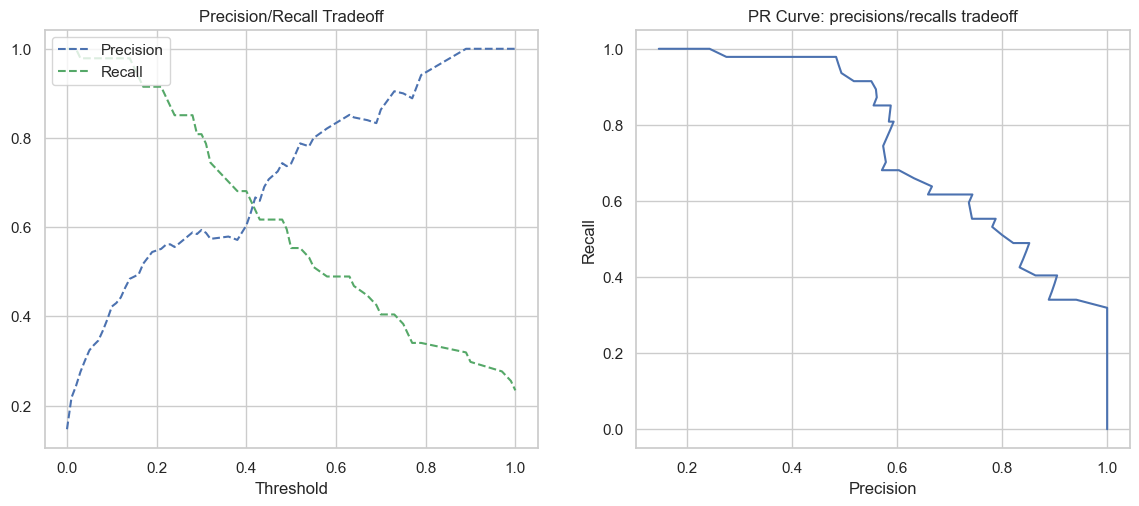

In [85]:
#plot ROC curve with AUC-ROC score
ypp=RF_model.predict_proba(X_test2)[:,1]
fpr,tpr,th=roc_curve(y_test,ypp)
auc=roc_auc_score(y_test,ypp)

#lw = 2
plt.plot(fpr, tpr, color='blue', lw=7, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=8, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc, "\n")

#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

The Random Forest Classifier model has F1-score of 0.62 and AUC-ROC score of 0.95 for high quality wine class. Much better than Logistic Regression Let's tune our Random Forest model

In [ ]:
# Random Forest
# Hyperparameter Tuning
#param_grid_rf = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)),
#                  "min_samples_leaf": list(range(5,20,1))}

param_grid_rf = dict(
    n_estimators= [100, 300, 500],
    max_depth= [5,  15, 25], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1,5,10] 
)
grid_search_rf=GridSearchCV(RandomForestClassifier(),param_grid_rf,cv=3,verbose=1,n_jobs = -1, scoring = 'roc_auc')
grid_search_rf.fit(X_train2, y_train)
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train2, y_train)


new_threshold2 = 0.39
y_pred_tuned_rf = best_estimator_rf.predict_proba(X_test2)[:,1]
y_pred_new_rf = (y_pred_tuned_rf >= new_threshold2).astype(int)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_new_rf)
cf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_new_rf)
cl_report_tuned_rf = classification_report(y_test, y_pred_new_rf)

print("\nBest Parameters (Random Forest):", best_params_rf)
print("Accuracy (Tuned Random Forest):", accuracy_tuned_rf)
print("Confusion Matrix (Tuned Random Forest):\n", cf_matrix_tuned_rf)
print("Classification Report (Tuned Random Forest):\n", cl_report_tuned_rf)

In [ ]:
# AUC-ROC
y_prob_rf = best_estimator_rf.predict_proba(X_test2)[:, 1]
#y_prob_new_rf = (y_prob_rf >= new_threshold).astype(int)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Random Forest):", roc_auc_rf)

The hyperparameter tuned Random Forest model has higher F1-score of 0.65 (the regular RF has F1-score of 0.62) and the AUC-ROC score is about the same 0.9485620762216507 vs 0.9457174031642117


Our Random Forest model perform much better than the Logistic Regression model, suggesting there is a complex, non-linear relationship between the features and hi quality target variable.

CONCLUSION: Our Random Forest model perform much better than the Logistic Regression model, suggesting there is a complex, non-linear relationship between the features and hi quality target variable.